In [1]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

#### 图像量化处理

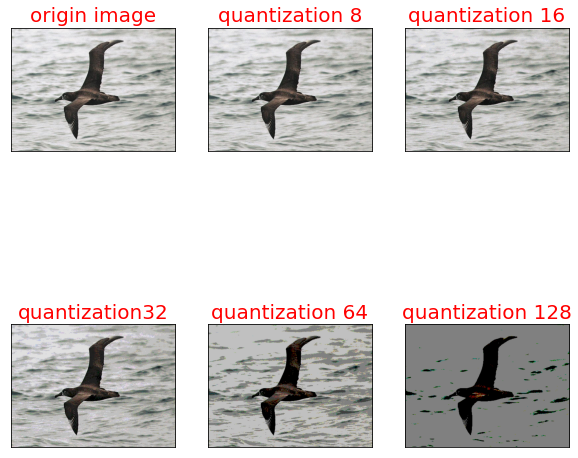

In [7]:
path = '/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg'
img_bgr = cv2.imread(path)
img_rgb = img_bgr[:,:,::-1] # 改变通道顺序
def image_quantify(img,ratio):
    img_tep = copy.deepcopy(img)
    width = img.shape[1]
    height = img.shape[0]
    channel = img.shape[2]
    for i in range(height):
        for j in range(width):
            for k in range(channel):
                img_tep[i][j][k] = int(img[i][j][k]/ratio)*ratio
    return img_tep
title =['origin image','quantization 8','quantization 16','quantization32','quantization 64','quantization 128']
ratio = [1,8,16,32,64,128]
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image_quantify(img_rgb,ratio[i]))
    plt.title(title[i],color="red",fontsize=20)
    plt.xticks([]),plt.yticks([])
plt.show()

#### 图像的采样

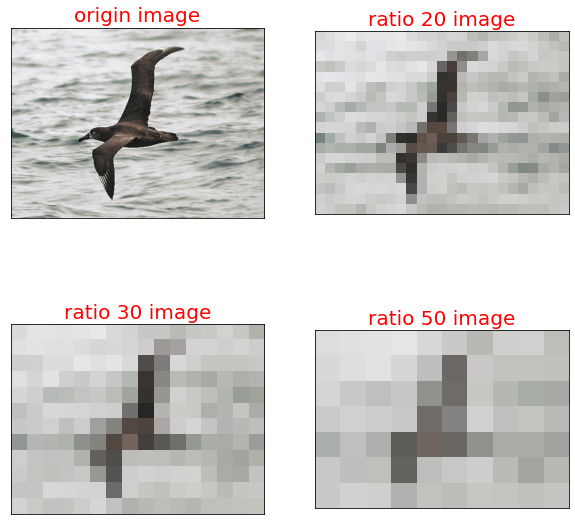

In [5]:
def image_sample(image,ratio):
    image1=np.zeros((int(image.shape[0]/ratio),
        int(image.shape[1]/ratio),
        image.shape[2]),dtype='float32')
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            for k in range(image1.shape[2]):
                delta=image[i*ratio:(i+1)*ratio,j*ratio:(j+1)*ratio,k]
                image1[i,j,k]=np.mean(delta)
    return image1
sample=[1,20,30,50]
title_sample = ['origin image','ratio 20 image','ratio 30 image','ratio 50 image']
img = []
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(image_sample(img_rgb,sample[i])/255)
    plt.title(title_sample[i],color='red',fontsize=20)
    # 不显示x y坐标
    plt.xticks([]),plt.yticks([])
plt.show()